#Trabalho Processamento de Sinais

#(0) - carregar dados e juntá-los em um único data frame

Bibliotecas a serem utilizadas

In [ ]:
# bibliotecas do trabalho
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
import math
import io
from plotnine import *
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale = 1.2, rc={"lines.linewidth": 2})

#bibliotecas para filtrar sinais
import scipy as sp
import scipy.fftpack
import scipy.signal as sg
# plot in browser instead of opening new windows
%matplotlib inline

#biblioteca knn-2
from sklearn.cluster import KMeans

#biblioteca normatização
import sklearn

#operações com tempo
import time

#biblioteca de sinais
import scipy as sp
import scipy.fftpack
import scipy.signal as sg

#FUNÇÕES <===============================================================

In [ ]:
def cria_tempo_filtração(_df_): #cria o campo tempo de filtração no dataframe original

  df__ = pd.DataFrame()

  df__ = _df_

  df__["Tempo_Filtração_[segundos]"] = ( (-1) * ( df__["Volume_Fermentador"] - 2000) ) * 7

  return df__

In [ ]:
def format_df_seg( _df_ ):  #formata o tempo coluna em spread
  
  df__ = pd.melt( _df_ , id_vars=["Dia","labels"], var_name="Volume_Fermentador",value_name="Extrato_Primitivo_Filtrado" )
  
  df__["H_F"] = ( 2000 - df__["Volume_Fermentador"] ) * 7 / 60 / 60 # calcula horas

  df__["M_F"] = ( 2000 - df__["Volume_Fermentador"] ) * 7 / 60 # calcula minutos
  df__["M_F"] = df__["M_F"] - df__["H_F"] * 60

  df__["S_F"] = ( 2000 - df__["Volume_Fermentador"] ) * 7 - df__["M_F"] * 60 - df__["H_F"] * 60 * 60 

  df__["Tempo_Filtração_[s]"] =  (df__["H_F"] + df_kn["M_F"] / 60 + df__["M_F"] / 60 / 60)*3600 

  df__.sort_values(['Dia' , 'Volume_Fermentador'], ascending=False, inplace=True) # mantém o ordenamento original

  return df__


In [ ]:
def agrupa_sinais( _df_ , sinais ):

  gp = sinais[0]
  sinais = sinais[1:5]

  print (gp)
  print (sinais)

  for j in sinais:
    for i in range(len( _df_ )):

      if np.int(_df_.iloc[i, 13]) == int(j):  #13 = Day_File
        _df_.iloc[i, 15] = gp
      else:
        pass

  return _df_

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
    

#(1) - Pré-tratamento dos dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sinais_Filtra_Cerveja_04_maio_2020.xlsx to Sinais_Filtra_Cerveja_04_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_05_maio_2020.xlsx to Sinais_Filtra_Cerveja_05_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_06_maio_2020.xlsx to Sinais_Filtra_Cerveja_06_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_07_maio_2020.xlsx to Sinais_Filtra_Cerveja_07_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_08_maio_2020.xlsx to Sinais_Filtra_Cerveja_08_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_09_maio_2020.xlsx to Sinais_Filtra_Cerveja_09_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_10_maio_2020.xlsx to Sinais_Filtra_Cerveja_10_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_11_maio_2020.xlsx to Sinais_Filtra_Cerveja_11_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_12_maio_2020.xlsx to Sinais_Filtra_Cerveja_12_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_13_maio_2020.xlsx to Sinais_Filtra_Cerveja_13_maio_2020.xlsx
Saving Sinais_Filtra_Cerveja_14_maio_2020.xlsx to Sinais_Filtra_Cerveja_14_maio_2020.xlsx
Saving Sin

Juntando os arquivos em uma única tabela


In [ ]:
list_dias = ("04","05","06","07","08","09",
             "11","12","13","14","15","16")
frag_1_text_file = "Sinais_Filtra_Cerveja_"
frag_2_text_tile = "_maio_2020.xlsx"

df = pd.DataFrame()

for i in list_dias:

  # collect one file
  nome_f           = frag_1_text_file + i + frag_2_text_tile
  df_              = pd.read_excel( nome_f ).dropna()
  df_["File_Name"] = nome_f
  df_["Day_File"]  = i

  # empilhamento vertical
  df = pd.concat([df, df_], axis=0)

NameError: ignored

# Salva uma cópia do arquivo

In [ ]:
writer = df.to_excel('arquivo_concatenado.xlsx')

Avaliando o arquivo gerado

In [ ]:
df

,Data,Hora,Extrato_Médio_Fermentador,Extrato_Primitivo_Fermentador,Volume_Fermentador,Extrato_Primitivo_Filtrado,Vazão_Cerv_Conc_Média,Vazão_Inicial_Filtração,Abertura_VA_SP,Abertura_VB_SP,Abertura_VA_modul,Abertura_VB_modul,File_Name,Day_File
0,2020-05-04,07:50:00,15.55,15.551255,2000.0,11.661723,501.0,168.0,37.0,54.0,37.0,54.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04
1,2020-05-04,07:50:07,15.55,15.513439,1999.0,11.523376,501.0,168.0,37.0,54.0,39.0,56.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04
2,2020-05-04,07:50:14,15.55,15.559832,1998.0,11.333884,501.0,168.0,37.0,54.0,41.0,58.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04
3,2020-05-04,07:50:21,15.55,15.553515,1997.0,11.228191,501.0,168.0,37.0,54.0,43.0,60.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04
4,2020-05-04,07:50:28,15.55,15.573802,1996.0,11.067199,501.0,168.0,37.0,54.0,45.0,62.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-05-16,11:59:45,15.96,15.964509,5.0,11.028113,516.0,270.0,37.0,55.0,27.0,45.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16
1996,2020-05-16,11:59:52,15.96,15.911182,4.0,11.208461,516.0,270.0,37.0,55.0,25.0,43.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16
1997,2020-05-16,11:59:59,15.96,16.016496,3.0,10.992927,516.0,270.0,37.0,55.0,27.0,45.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16
1998,2020-05-16,12:00:06,15.96,15.895151,2.0,11.234906,516.0,270.0,37.0,55.0,25.0,43.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16



Mais informações sobre o data frame

In [ ]:

print (f"Formato do data frame : {df.shape} \n")
print (f"Classe do data frame : {df.index} \n")
print (f"Número de colunas : {df.columns} \n")
print ("#"*30)
df.info()
print ("#"*30)
df.dtypes.value_counts()


Formato do data frame : (24000, 14) 

Classe do data frame : Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=24000) 

Número de colunas : Index(['Data', 'Hora', 'Extrato_Médio_Fermentador',
       'Extrato_Primitivo_Fermentador', 'Volume_Fermentador',
       'Extrato_Primitivo_Filtrado', 'Vazão_Cerv_Conc_Média',
       'Vazão_Inicial_Filtração', 'Abertura_VA_SP', 'Abertura_VB_SP',
       'Abertura_VA_modul', 'Abertura_VB_modul', 'File_Name', 'Day_File'],
      dtype='object') 

##############################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data                           24000 non-null  datetime64[ns]
 1   Hora                      

float64           10
object             3
datetime64[ns]     1
dtype: int64

Cria a coluna Tempo de Filtração

In [ ]:
cria_tempo_filtração( df )

,Data,Hora,Extrato_Médio_Fermentador,Extrato_Primitivo_Fermentador,Volume_Fermentador,Extrato_Primitivo_Filtrado,Vazão_Cerv_Conc_Média,Vazão_Inicial_Filtração,Abertura_VA_SP,Abertura_VB_SP,Abertura_VA_modul,Abertura_VB_modul,File_Name,Day_File,Tempo_Filtração_[segundos]
0,2020-05-04,07:50:00,15.55,15.551255,2000.0,11.661723,501.0,168.0,37.0,54.0,37.0,54.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,-0.0
1,2020-05-04,07:50:07,15.55,15.513439,1999.0,11.523376,501.0,168.0,37.0,54.0,39.0,56.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,7.0
2,2020-05-04,07:50:14,15.55,15.559832,1998.0,11.333884,501.0,168.0,37.0,54.0,41.0,58.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,14.0
3,2020-05-04,07:50:21,15.55,15.553515,1997.0,11.228191,501.0,168.0,37.0,54.0,43.0,60.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,21.0
4,2020-05-04,07:50:28,15.55,15.573802,1996.0,11.067199,501.0,168.0,37.0,54.0,45.0,62.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-05-16,11:59:45,15.96,15.964509,5.0,11.028113,516.0,270.0,37.0,55.0,27.0,45.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16,13965.0
1996,2020-05-16,11:59:52,15.96,15.911182,4.0,11.208461,516.0,270.0,37.0,55.0,25.0,43.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16,13972.0
1997,2020-05-16,11:59:59,15.96,16.016496,3.0,10.992927,516.0,270.0,37.0,55.0,27.0,45.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16,13979.0
1998,2020-05-16,12:00:06,15.96,15.895151,2.0,11.234906,516.0,270.0,37.0,55.0,25.0,43.0,Sinais_Filtra_Cerveja_16_maio_2020.xlsx,16,13986.0


#(2) Visualizações iniciais do data set

Perfil de todos os sinais selecionados com faceting sns

Text(677.2, 0.5, 'Extrato Primitivo em')

<Figure size 1080x360 with 0 Axes>

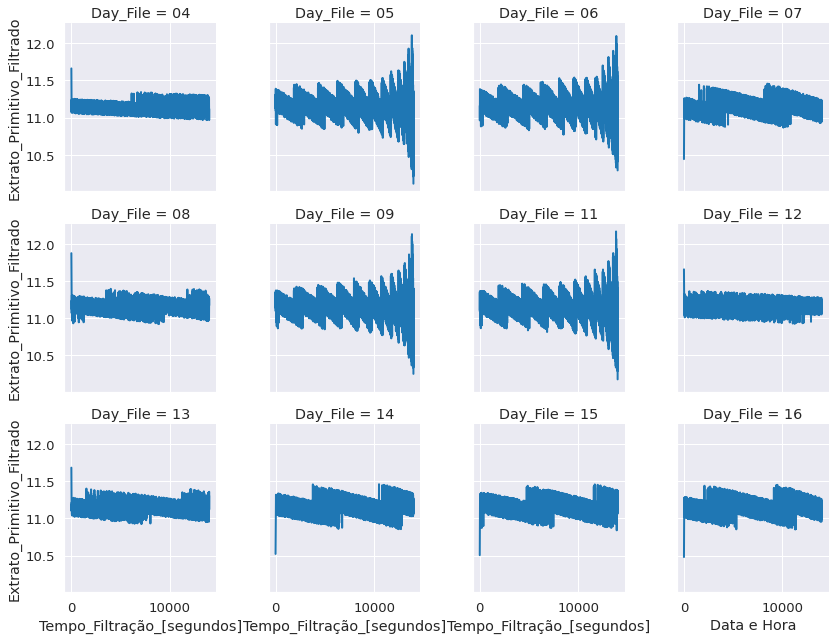

In [ ]:

plt.figure(figsize = (15,5))

g = sns.FacetGrid(df , col="Day_File", height=3, col_wrap=4)
g.map(sns.lineplot, "Tempo_Filtração_[segundos]", "Extrato_Primitivo_Filtrado")

plt.xlabel('Data e Hora')
plt.ylabel('Extrato Primitivo em')

Agrupamento dos sinais com similaridade visual para melhor visualização

In [ ]:
df["Grupo"] = np.nan


In [ ]:
sinais_padrão = ["00", "04", "08", "12", "13"]
sinais_anom_1 = ["01", "07", "14", "15", "16"]
sinais_anom_2 = ["02", "05", "06", "09", "11"]


agrupa_sinais( df , sinais_padrão ) 
agrupa_sinais( df , sinais_anom_1 )
agrupa_sinais( df , sinais_anom_2 )

df["Grupo_Dia"] = df["Grupo"] +"_"+ df["Day_File"]

00
['04', '08', '12', '13']
01
['07', '14', '15', '16']
02
['05', '06', '09', '11']


In [ ]:
df["Data_Hora"] = pd.to_datetime( df.Data.astype(str) + ' ' + df.Hora.astype(str) ) # feature da data e hora

In [ ]:
df['Hora'].map(lambda x: x.strftime('%H:%M:%S') if pd.notnull(x) else '') # formata hora

0       07:50:00
1       07:50:07
2       07:50:14
3       07:50:21
4       07:50:28
          ...   
1995    11:59:45
1996    11:59:52
1997    11:59:59
1998    12:00:06
1999    12:00:13
Name: Hora, Length: 24000, dtype: object

In [ ]:
df_1 = df
df_1.sort_values(['Grupo' , 'Day_File', 'Tempo_Filtração_[segundos]'], ascending=True, inplace=True) 
df_1

,Data,Hora,Extrato_Médio_Fermentador,Extrato_Primitivo_Fermentador,Volume_Fermentador,Extrato_Primitivo_Filtrado,Vazão_Cerv_Conc_Média,Vazão_Inicial_Filtração,Abertura_VA_SP,Abertura_VB_SP,Abertura_VA_modul,Abertura_VB_modul,File_Name,Day_File,Tempo_Filtração_[segundos],Grupo,Grupo_Dia,Data_Hora
0,2020-05-04,07:50:00,15.55,15.551255,2000.0,11.661723,501.0,168.0,37.0,54.0,37.0,54.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,-0.0,00,00_04,2020-05-04 07:50:00
1,2020-05-04,07:50:07,15.55,15.513439,1999.0,11.523376,501.0,168.0,37.0,54.0,39.0,56.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,7.0,00,00_04,2020-05-04 07:50:07
2,2020-05-04,07:50:14,15.55,15.559832,1998.0,11.333884,501.0,168.0,37.0,54.0,41.0,58.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,14.0,00,00_04,2020-05-04 07:50:14
3,2020-05-04,07:50:21,15.55,15.553515,1997.0,11.228191,501.0,168.0,37.0,54.0,43.0,60.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,21.0,00,00_04,2020-05-04 07:50:21
4,2020-05-04,07:50:28,15.55,15.573802,1996.0,11.067199,501.0,168.0,37.0,54.0,45.0,62.0,Sinais_Filtra_Cerveja_04_maio_2020.xlsx,04,28.0,00,00_04,2020-05-04 07:50:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-05-11,12:02:45,15.99,16.004203,5.0,10.359586,515.0,225.0,28.0,67.0,6.0,45.0,Sinais_Filtra_Cerveja_11_maio_2020.xlsx,11,13965.0,02,02_11,2020-05-11 12:02:45
1996,2020-05-11,12:02:52,15.99,15.952464,4.0,11.407815,515.0,225.0,28.0,67.0,4.0,43.0,Sinais_Filtra_Cerveja_11_maio_2020.xlsx,11,13972.0,02,02_11,2020-05-11 12:02:52
1997,2020-05-11,12:02:59,15.99,15.976097,3.0,10.286243,515.0,225.0,28.0,67.0,6.0,45.0,Sinais_Filtra_Cerveja_11_maio_2020.xlsx,11,13979.0,02,02_11,2020-05-11 12:02:59
1998,2020-05-11,12:03:06,15.99,15.955377,2.0,11.351130,515.0,225.0,28.0,67.0,4.0,43.0,Sinais_Filtra_Cerveja_11_maio_2020.xlsx,11,13986.0,02,02_11,2020-05-11 12:03:06


Refazendo a visualização inicial dos sinais.

Text(677.2, 0.5, 'Extr. Primitivo')

<Figure size 1080x360 with 0 Axes>

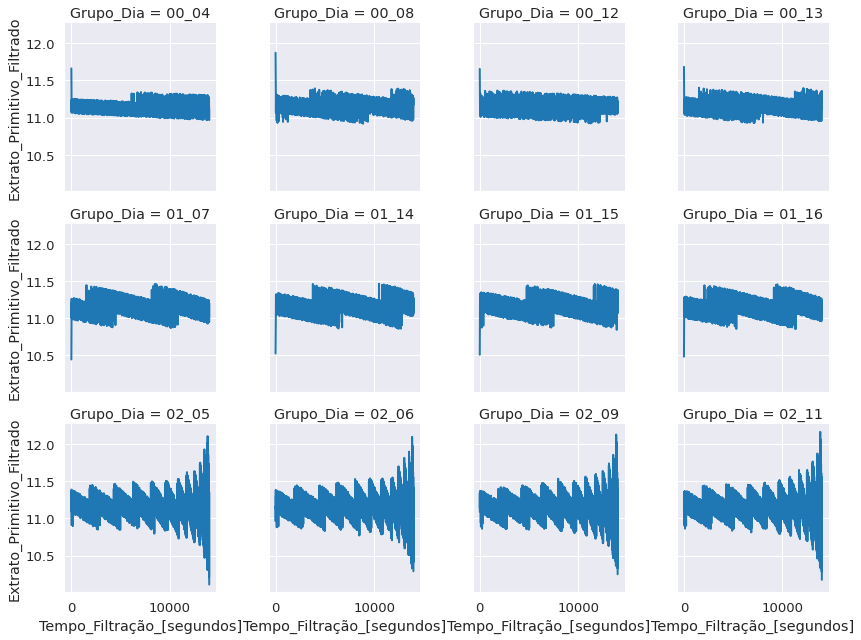

In [ ]:
plt.figure(figsize = (15,5))

g = sns.FacetGrid(df_1 , col="Grupo_Dia", height=3, col_wrap=4)
g.map(sns.lineplot, "Tempo_Filtração_[segundos]", "Extrato_Primitivo_Filtrado")

plt.ylabel('Extr. Primitivo')

Selecionando os features a serem utilizados no processamento de sinais (opção 1)

In [ ]:
df_SG_1 = df.pivot(index='Tempo_Filtração_[segundos]',columns='Grupo_Dia',values='Extrato_Primitivo_Filtrado') 

In [ ]:
df_SG_1

NameError: ignored

Selecionando os features a serem utilizados no processamento de sinais (opção 2)

In [ ]:
df_SG_2 = df[["Data_Hora","Extrato_Primitivo_Filtrado"]]

df_SG_2

,Data_Hora,Extrato_Primitivo_Filtrado
0,2020-05-04 07:50:00,11.661723
1,2020-05-04 07:50:07,11.523376
2,2020-05-04 07:50:14,11.333884
3,2020-05-04 07:50:21,11.228191
4,2020-05-04 07:50:28,11.067199
...,...,...
1995,2020-05-11 12:02:45,10.359586
1996,2020-05-11 12:02:52,11.407815
1997,2020-05-11 12:02:59,10.286243
1998,2020-05-11 12:03:06,11.351130


#(3) Realizar o processamento do sinal

- Estratégia de execução sinal a sinal

In [ ]:
data = df_SG_1

#- variável signal e t

In [ ]:
T = 14
t= T * data.index.values
#t= pd.DataFrame(t)
signal = data.iloc[:, 0:]
signal.reset_index(inplace=True, drop=True)

In [ ]:
t

array([-0.00000e+00,  9.80000e+01,  1.96000e+02, ...,  1.95706e+05,
        1.95804e+05,  1.95902e+05])

In [ ]:
signal

Grupo_Dia,00_04,00_08,00_12,00_13,01_07,01_14,01_15,01_16,02_05,02_06,02_09,02_11
0,11.661723,11.872356,11.655068,11.683282,10.442112,10.522725,10.506263,10.480612,11.095096,11.159579,11.143045,11.090406
1,11.523376,11.758616,11.427112,11.489288,10.637640,10.660738,10.711195,10.650508,11.311260,10.962869,11.347284,11.353288
2,11.333884,11.597537,11.357539,11.406756,10.871773,10.903975,10.926532,10.844326,11.123523,11.100590,11.092353,11.103273
3,11.228191,11.432429,11.221885,11.273863,11.012792,11.074697,11.152558,11.076785,11.388632,11.383749,11.353361,11.332851
4,11.067199,11.300706,11.082804,11.102446,11.259128,11.271889,11.314418,11.268883,11.161780,11.131070,11.130805,11.131089
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,11.100595,11.201373,11.060749,11.318692,10.981986,11.041964,11.128624,11.028113,10.302122,10.465963,10.369851,10.359586
1996,11.258188,10.976649,11.224631,11.111709,11.197530,11.277434,11.375029,11.208461,11.364915,11.555865,11.396145,11.407815
1997,11.158113,11.123296,11.069185,11.308526,11.007013,11.058784,11.061777,10.992927,10.208332,10.408059,10.330621,10.286243
1998,10.967355,11.264263,11.220050,11.120375,11.201516,11.264127,11.324061,11.234906,11.348853,11.420407,11.401467,11.351130


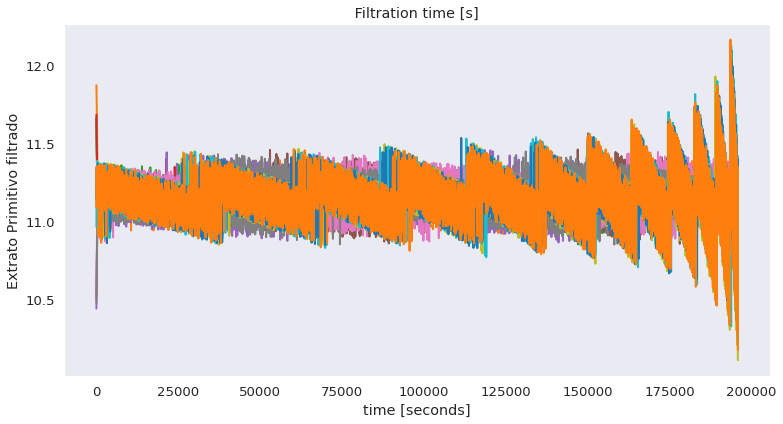

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=72)
axes = fig.add_axes([0.01, 0.01, .98, 0.98])

plt.plot( t , signal )

plt.xlabel( "time [seconds]" )
plt.ylabel( "Extrato Primitivo filtrado" )
plt.title( " Filtration time [s] " )

plt.grid()
plt.show()

#- domínio da frequência

In [ ]:
signal.iloc[:, 0]

0       11.661723
1       11.523376
2       11.333884
3       11.228191
4       11.067199
          ...    
1995    11.100595
1996    11.258188
1997    11.158113
1998    10.967355
1999    11.116443
Name: 00_04, Length: 2000, dtype: float64

In [ ]:
# The FFT of the signal
signal_fft = sp.fftpack.fft( signal.iloc[:, 0].values )

# Power spectral density (PSD) estimate
power = np.abs(signal_fft)**2

# The corresponding frequencies
#sample_freq = sp.fftpack.fftfreq(signal.size, d=time_step)
sample_freq = sp.fftpack.fftfreq(len(signal.iloc[:,0]), d=T)

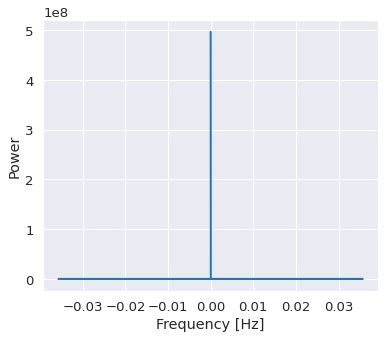

In [ ]:
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.show()

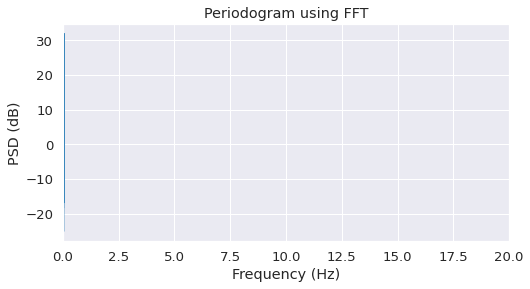

In [ ]:
#To only obtain the positive frequencies...
i = sample_freq > 0
#We now plot the power spectral density of our signal, 
#as a function of the frequency (in unit of 1/year). We choose a logarithmic scale for the y axis (decibels):
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(sample_freq[i], 10 * np.log10(power[i]))
ax.set_xlim(0, 20)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
ax.set_title( "Periodogram using FFT" )
plt.show()

In [ ]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print(peak_freq)

0.035678571428571434


#Filtering a signal

In [ ]:
my_sig=signal[:,0].values

def butter_bandpass  # sessão de funções

def butter_bandpass_filter # sessão de funções

In [ ]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass_filter(lowcut, highcut, fs, order=order) # não existe algumas funções no código exemplo (butter é uma delas)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>